In [22]:
import tensorflow as tf

from tensorflow import  keras
from tensorflow.keras import layers
print(tf.__version__)
print(keras.__version__)

2.20.0
3.12.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

1. Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [7]:
y_train[0]

np.uint8(9)

In [8]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
class_names[y_train[0]]
class_nums= len(class_names)
print(class_nums)

10


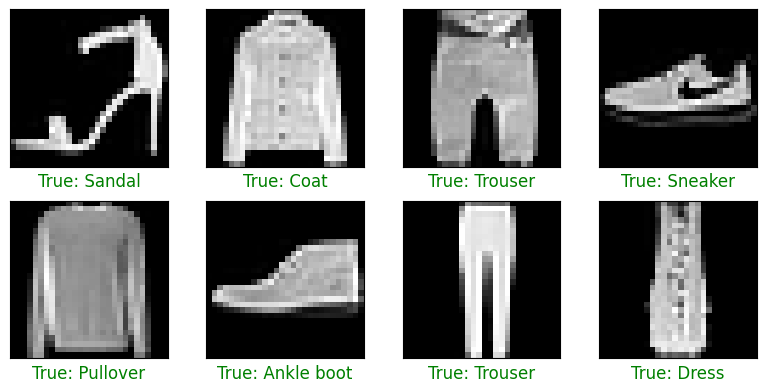

In [74]:
from typing import Optional

def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
    nrows,ncols = 2,4
    fig, axes = plt.subplots(nrows,ncols, figsize=(8,4))

    len_x = x_data.shape[0]
    for idx in range(nrows*ncols):
        ax = axes[idx//ncols, idx%ncols]

        img_idx = random.randint(0, len_x)

        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[],)
        color = 'green'
        true_label_str = f"True: {class_names[y_data[img_idx]]}"

        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label =  class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f"\nPred: {predicted_label}"

        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
        ax.set_xlabel(img_title, color=color, fontsize=12)

    
    plt.tight_layout()
    plt.show()

plot_data(x_test, y_test)

2. Image Pre-processing
    + Reshaping it into the shape the model expects
    + Scaling it so that all values are in the [0, 1] interval
    + Transform from uint8 into float32

In [10]:
# Convert to float32 & scale images to the [0, 1] range for training
x_train = x_train.astype(np.float32) / 255
x_test  = x_test.astype(np.float32) / 255

In [15]:
x_test.shape, x_test.dtype

((10000, 28, 28, 1), dtype('float32'))

In [12]:
# Make sure images have shape (60000, 28, 28) -> (60000, 28, 28, 1)
x_train  = np.expand_dims(x_train, axis=-1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_test  = np.expand_dims(x_test, axis=-1)

In [18]:
# convert class vectors to binary class matrices: 1 -> [0 1 0 0 ...]
#
# 1             => sparse_categorical_crossentropy
# [0 1 0 0 ...] => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [20]:
y_train[0], y_train_label[0]

(np.uint8(9), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

3. Network (ANN) Architecture

In [24]:
input_shape = (28, 28, 1)

In [32]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

model.summary()

c:\Users\quang\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
epochs=10
batch_size = 128
history = model.fit(x_train, y_train_label, 
          epochs=epochs, 
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7948 - loss: 0.5593 - val_accuracy: 0.8262 - val_loss: 0.4695
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8573 - loss: 0.3841 - val_accuracy: 0.8727 - val_loss: 0.3555
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8751 - loss: 0.3381 - val_accuracy: 0.8573 - val_loss: 0.3780
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8844 - loss: 0.3118 - val_accuracy: 0.8802 - val_loss: 0.3273
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8920 - loss: 0.2902 - val_accuracy: 0.8802 - val_loss: 0.3336
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8971 - loss: 0.2735 - val_accuracy: 0.8750 - val_loss: 0.3505
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9020 - loss: 0.2608 - val_accuracy: 0.8797 - val_loss: 0.3427
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9064 - loss: 0.2484 - val_accuracy: 0.

In [35]:
history_dict = history.history

In [36]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

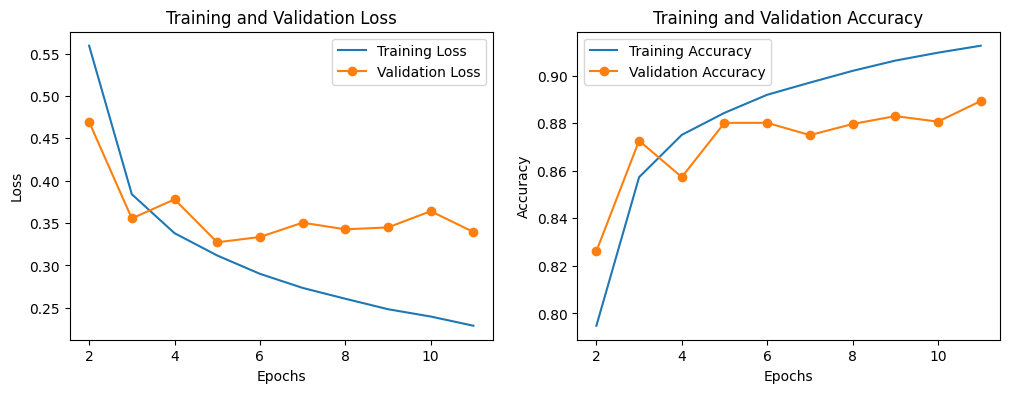

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epochs_runs = [i+1 for i in range(1, epochs+1)]

ax1.plot(epochs_runs, train_loss, label='Training Loss')
ax1.plot(epochs_runs, val_loss, label='Validation Loss',marker='o')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs_runs, train_acc, label='Training Accuracy')
ax2.plot(epochs_runs, val_acc, label='Validation Accuracy',marker='o')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

4. Model Evaluation

In [43]:
score = model.evaluate(x_test, y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8773 - loss: 0.3528


In [47]:
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.3528
Test accuracy: 0.8773


In [48]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [49]:
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
predictions = np.argmax(y_proba, axis=1)

In [58]:
[class_names[pred] for pred in predictions]


['Ankle boot', 'Pullover', 'Trouser']

In [60]:
y_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


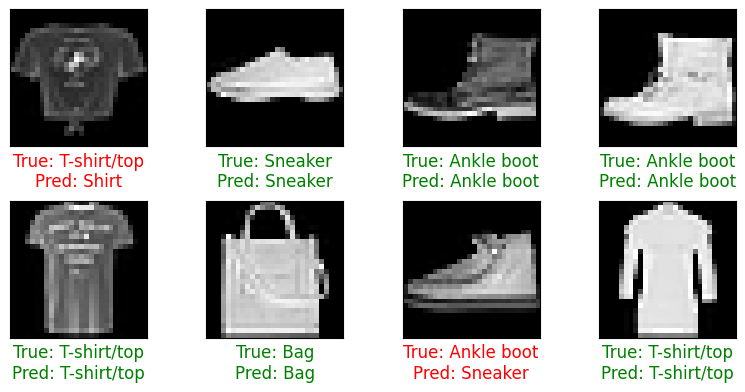

In [80]:
plot_data(x_test, y_test, y_proba)

In [79]:
model.save("fashion_mnist_ann_model.h5")
